In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit

# Histograms

## Example: $\chi^2$ distribution with low statistics

In [55]:
samples = np.random.chisquare(df=5, size=20)

def func(x,N,k):
    return N * stats.chi2(df=k).pdf(x)

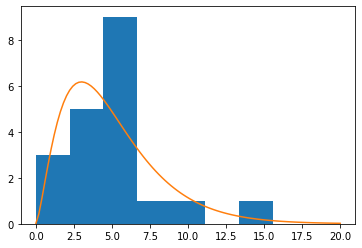

In [59]:
hdata,bins,foo = plt.hist( samples , bins=np.linspace(0,20,10))

xx = np.linspace(0,20,100)
plt.plot( xx, 40*stats.chi2(df=5).pdf(xx) );

# Python's default fit routine

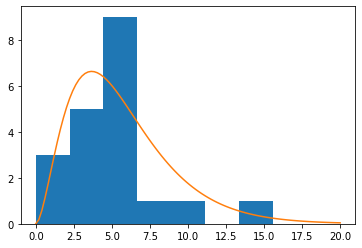

In [66]:
# evaluate at bin centers
xdata = ( bins[:-1] + bins[1:] ) / 2.0 

popt, pcov = curve_fit(func, xdata, hdata)
# print(popt)
# print(pcov)

plt.hist( samples , bins=np.linspace(0,20,10))
plt.plot( xx, func(xx,*popt) )

# Fit with errors
SciPy does not by default take errors into account. What happens if we do?

/usr/local/lib/python3.9/site-packages/scipy/optimize/minpack.py:755: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/usr/local/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


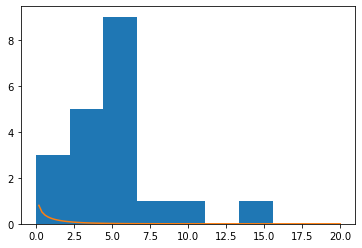

In [68]:
# evaluate at bin centers
popt, pcov = curve_fit(func, xdata, hdata, sigma=np.sqrt(hdata), absolute_sigma=True)

plt.hist( samples , bins=np.linspace(0,20,10))
plt.plot( xx, func(xx,*popt) );

# Fitting a Histogram

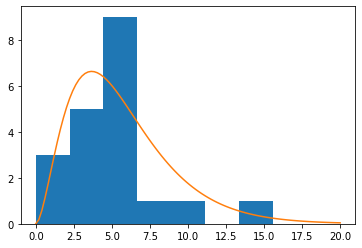

In [71]:
plt.hist( samples , bins=np.linspace(0,20,10))
popt, pcov = curve_fit(func, xdata, hdata)
plt.plot( xx, func(xx,*popt) );

# Fitting a Histogram

What is the expected bin content $B_i$?

$$ B_i = \int_{x_i}^{x_{i+1}} P(x) \,\mathrm{d}x $$

How does the bin content fluctuate?

Poisson distribution with mean $B_i$.